In [54]:
import pandas as pd

# Aprendizado não-supervisionado

### Nem sempre teremos uma variavel alvo para estimar. Para esse tipo de problema, temos os algoritmos de aprendizado não-supervisionado

Os algoritmos de aprendizado nao-supervisionado estao ainda divididos em dois grupos. Os algoritmos de clusterizacao (agrupamento) e os de reducao de dimensao. 

In [55]:
movies = pd.read_csv("movie_lens_completo.csv")

In [56]:
movies.head()

,id,title,release_date,imdb_url,user_id,item_id,rating,timestamp,age,sex,ocuppation,zip_code,faixa_etaria,genero
0,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,244,1,4,1997-11-27 04:20:05,28,M,technician,80525,20-29,Animation
1,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,298,1,5,1998-01-06 22:34:21,44,M,executive,01581,40-49,Animation
2,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,253,1,5,1998-04-03 18:34:27,26,F,librarian,22903,20-29,Animation
3,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,305,1,5,1998-02-01 08:52:33,23,M,programmer,94086,20-29,Animation
4,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,6,1,4,1997-12-31 20:17:58,42,M,executive,98101,40-49,Animation


In [57]:
qnt_dados = movies.shape[0]
print("Dados: {}".format(qnt_dados))

qnt_movies = movies["id"].unique().size
print("Movies: {}".format(qnt_movies))

qnt_users = movies["user_id"].unique().size
print("Users: {}".format(qnt_users))

Dados: 100000
Movies: 1682
Users: 943


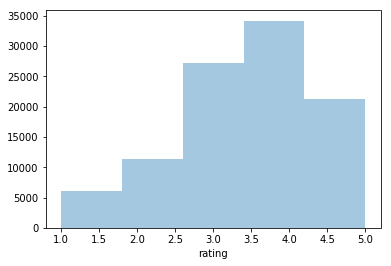

In [58]:
%matplotlib inline

import seaborn as sns
sns.distplot(movies["rating"], bins=5,kde=False)

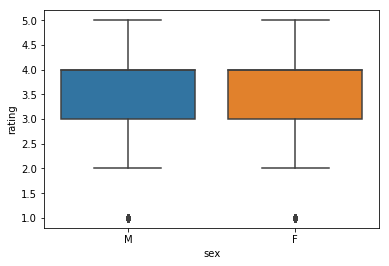

In [59]:
sns.boxplot(x="sex", y="rating", data=movies)

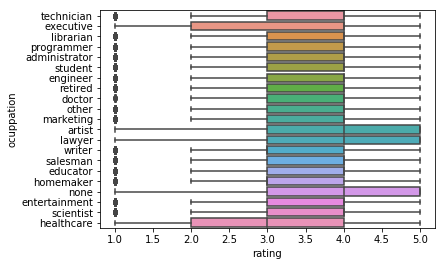

In [60]:
sns.boxplot(x="rating", y="ocuppation", data=movies)

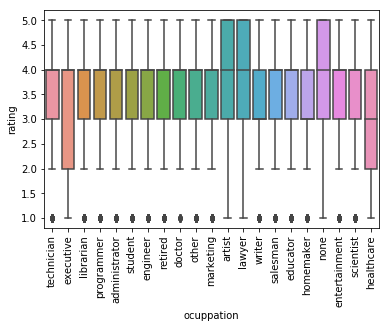

In [61]:
import matplotlib.pyplot as plt
plt.xticks(rotation=90)

sns.boxplot(x="ocuppation", y="rating", data=movies)

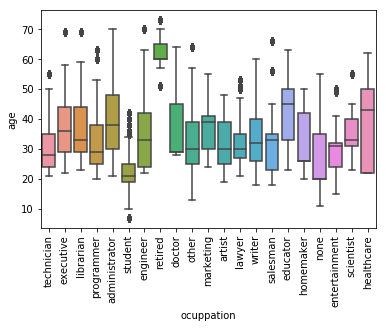

In [62]:
import matplotlib.pyplot as plt

plt.xticks(rotation=90)
sns.boxplot(x="ocuppation", y="age", data=movies)

In [63]:
movies_dmy = pd.get_dummies(movies, columns=["sex", "ocuppation", "genero"])
movies_dmy.head()

,id,title,release_date,imdb_url,user_id,item_id,rating,timestamp,age,zip_code,...,genero_Film-Noir,genero_Horror,genero_Musical,genero_Mystery,genero_Romance,genero_Sci-Fi,genero_Thriller,genero_War,genero_Western,genero_unknown
0,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,244,1,4,1997-11-27 04:20:05,28,80525,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,298,1,5,1998-01-06 22:34:21,44,01581,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,253,1,5,1998-04-03 18:34:27,26,22903,...,0,0,0,0,0,0,0,0,0,0
3,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,305,1,5,1998-02-01 08:52:33,23,94086,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,6,1,4,1997-12-31 20:17:58,42,98101,...,0,0,0,0,0,0,0,0,0,0


In [64]:
movies_dmy.columns

Index(['id', 'title', 'release_date', 'imdb_url', 'user_id', 'item_id',
       'rating', 'timestamp', 'age', 'zip_code', 'faixa_etaria', 'sex_F',
       'sex_M', 'ocuppation_administrator', 'ocuppation_artist',
       'ocuppation_doctor', 'ocuppation_educator', 'ocuppation_engineer',
       'ocuppation_entertainment', 'ocuppation_executive',
       'ocuppation_healthcare', 'ocuppation_homemaker', 'ocuppation_lawyer',
       'ocuppation_librarian', 'ocuppation_marketing', 'ocuppation_none',
       'ocuppation_other', 'ocuppation_programmer', 'ocuppation_retired',
       'ocuppation_salesman', 'ocuppation_scientist', 'ocuppation_student',
       'ocuppation_technician', 'ocuppation_writer', 'genero_Action',
       'genero_Adventure', 'genero_Animation', 'genero_Children's',
       'genero_Comedy', 'genero_Crime', 'genero_Documentary', 'genero_Drama',
       'genero_Fantasy', 'genero_Film-Noir', 'genero_Horror', 'genero_Musical',
       'genero_Mystery', 'genero_Romance', 'genero_Sci-Fi',

In [65]:
# no dataframe, nao apareceram todas as colunas
# tivemos que ver por '.columns'
# no dummies, a gente transformou o resultado daquelas colunas em '0' e '1'

In [66]:
movies_dmy.zip_code.head()

0    80525
1    01581
2    22903
3    94086
4    98101
Name: zip_code, dtype: object

## Vamos carregar um dataset da relacao dos zip_code e dos estados

In [67]:
cep = pd.read_csv("http://bit.ly/2nEJKar")

In [68]:
cep.head()

,Zipcode,ZipCodeType,City,State,LocationType,Lat,Long,Location,Decommisioned,TaxReturnsFiled,EstimatedPopulation,TotalWages
0,705,STANDARD,AIBONITO,PR,PRIMARY,18.14,-66.26,NA-US-PR-AIBONITO,False,NaN,NaN,NaN
1,610,STANDARD,ANASCO,PR,PRIMARY,18.28,-67.14,NA-US-PR-ANASCO,False,NaN,NaN,NaN
2,611,PO BOX,ANGELES,PR,PRIMARY,18.28,-66.79,NA-US-PR-ANGELES,False,NaN,NaN,NaN
3,612,STANDARD,ARECIBO,PR,PRIMARY,18.45,-66.73,NA-US-PR-ARECIBO,False,NaN,NaN,NaN
4,601,STANDARD,ADJUNTAS,PR,PRIMARY,18.16,-66.72,NA-US-PR-ADJUNTAS,False,NaN,NaN,NaN


In [69]:
zipcode_state = cep[["Zipcode", "State"]]
zipcode_state.head()

,Zipcode,State
0,705,PR
1,610,PR
2,611,PR
3,612,PR
4,601,PR


A coluna Zipcode do dataset que carregamos eh um int64. A coluna zip_code do dataset do filme eh string (object).

So vamos conseguir fazer o merge se os dois forem do mesmo tipo. Entao vamos converter a coluna Zipcode (int64) para string. 

In [70]:
zipcode_state_final = zipcode_state.copy()

In [71]:
zipcode_state_final["Zipcode"] = zipcode_state["Zipcode"].astype("str")

In [76]:
movies_with_state = pd.merge(movies_dmy, zipcode_state_final, how="left", left_on="zip_code", right_on="Zipcode")
movies_with_state.head()

,id,title,release_date,imdb_url,user_id,item_id,rating,timestamp,age,zip_code,...,genero_Musical,genero_Mystery,genero_Romance,genero_Sci-Fi,genero_Thriller,genero_War,genero_Western,genero_unknown,Zipcode,State
0,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,244,1,4,1997-11-27 04:20:05,28,80525,...,0,0,0,0,0,0,0,0,80525,CO
1,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,298,1,5,1998-01-06 22:34:21,44,01581,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,253,1,5,1998-04-03 18:34:27,26,22903,...,0,0,0,0,0,0,0,0,22903,VA
3,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,305,1,5,1998-02-01 08:52:33,23,94086,...,0,0,0,0,0,0,0,0,94086,CA
4,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,6,1,4,1997-12-31 20:17:58,42,98101,...,0,0,0,0,0,0,0,0,98101,WA


In [77]:
#tipos de join: left join; right join; inner join; full outer

In [79]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

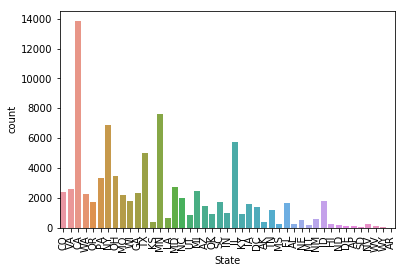

In [80]:
plt.xticks(rotation=90)

sns.countplot(movies_with_state["State"])

In [83]:
movies_with_state_dmy = pd.get_dummies(movies_with_state, columns=["State"])
movies_with_state_dmy.head()

,id,title,release_date,imdb_url,user_id,item_id,rating,timestamp,age,zip_code,...,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,State_WV,State_WY
0,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,244,1,4,1997-11-27 04:20:05,28,80525,...,0,0,0,0,0,0,0,0,0,0
1,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,298,1,5,1998-01-06 22:34:21,44,01581,...,0,0,0,0,0,0,0,0,0,0
2,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,253,1,5,1998-04-03 18:34:27,26,22903,...,0,0,0,0,0,1,0,0,0,0
3,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,305,1,5,1998-02-01 08:52:33,23,94086,...,0,0,0,0,0,0,0,0,0,0
4,1,Toy Story,01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,6,1,4,1997-12-31 20:17:58,42,98101,...,0,0,0,0,0,0,1,0,0,0


In [84]:
# os estados agora viraram numeros; os nulos viram '0'; nao ha coluna para nulos

In [85]:
movies_with_state_dmy.columns

Index(['id', 'title', 'release_date', 'imdb_url', 'user_id', 'item_id',
       'rating', 'timestamp', 'age', 'zip_code', 'faixa_etaria', 'sex_F',
       'sex_M', 'ocuppation_administrator', 'ocuppation_artist',
       'ocuppation_doctor', 'ocuppation_educator', 'ocuppation_engineer',
       'ocuppation_entertainment', 'ocuppation_executive',
       'ocuppation_healthcare', 'ocuppation_homemaker', 'ocuppation_lawyer',
       'ocuppation_librarian', 'ocuppation_marketing', 'ocuppation_none',
       'ocuppation_other', 'ocuppation_programmer', 'ocuppation_retired',
       'ocuppation_salesman', 'ocuppation_scientist', 'ocuppation_student',
       'ocuppation_technician', 'ocuppation_writer', 'genero_Action',
       'genero_Adventure', 'genero_Animation', 'genero_Children's',
       'genero_Comedy', 'genero_Crime', 'genero_Documentary', 'genero_Drama',
       'genero_Fantasy', 'genero_Film-Noir', 'genero_Horror', 'genero_Musical',
       'genero_Mystery', 'genero_Romance', 'genero_Sci-Fi',

In [87]:
movies_with_state_dmy.to_csv("movielens_final.csv", index=False)
# index False tira o 'id', na coluna da esquerda

# K-means

K-means eh um algoritmo de agrupamento. A ideia eh agrupar os dados por proximidade a um ponto central. Para falarmos sobre proximidade devemos entender o conceito de distancia e similaridade.

#### Similaridade e distância

Vamos analisar o conceito de distancia inicialmente.
Vamos imaginar um conjunto de dados que pode ser representado por dois volumes numericos, x1 e x2.

In [90]:
dados_matrix = [[1,2],
                [2,1],
                [2,3.2],
                [3,2.5],
                [4,1],
                [1.2,1],
                [0.2,7.3]]
dados = pd.DataFrame(dados_matrix,columns=["X1", "X2"])
dados

,X1,X2
0,1.0,2.0
1,2.0,1.0
2,2.0,3.2
3,3.0,2.5
4,4.0,1.0
5,1.2,1.0
6,0.2,7.3


In [96]:
# aqui tem um grafico estilo plano cartesiano

In [93]:
def dist(a, b):
    somatorio = 0.0
    for i in range(len(a)):
        somatorio = somatorio + (a[i]-b[i])**2
    return somatorio**0.5

In [95]:
dado_a = dados_matrix[0]
dado_b = dados_matrix[2]
d_ab = dist(dado_a, dado_b)

print("""
a distancia de {} a {} eh de {}
""".format(dado_a, dado_b, d_ab))


a distancia de [1, 2] a [2, 3.2] eh de 1.562049935181331



In [97]:
####

In [100]:
movies_with_state_dmy.columns

Index(['id', 'title', 'release_date', 'imdb_url', 'user_id', 'item_id',
       'rating', 'timestamp', 'age', 'zip_code', 'faixa_etaria', 'sex_F',
       'sex_M', 'ocuppation_administrator', 'ocuppation_artist',
       'ocuppation_doctor', 'ocuppation_educator', 'ocuppation_engineer',
       'ocuppation_entertainment', 'ocuppation_executive',
       'ocuppation_healthcare', 'ocuppation_homemaker', 'ocuppation_lawyer',
       'ocuppation_librarian', 'ocuppation_marketing', 'ocuppation_none',
       'ocuppation_other', 'ocuppation_programmer', 'ocuppation_retired',
       'ocuppation_salesman', 'ocuppation_scientist', 'ocuppation_student',
       'ocuppation_technician', 'ocuppation_writer', 'genero_Action',
       'genero_Adventure', 'genero_Animation', 'genero_Children's',
       'genero_Comedy', 'genero_Crime', 'genero_Documentary', 'genero_Drama',
       'genero_Fantasy', 'genero_Film-Noir', 'genero_Horror', 'genero_Musical',
       'genero_Mystery', 'genero_Romance', 'genero_Sci-Fi',

In [101]:
all_columns = list(movies_with_state_dmy.columns)

In [102]:
ocuppation_state_columns = []
for c in all_columns:
    if c.startswith("State_") or c.startswith("ocuppation_"):
        ocuppation_state_columns.append(c)

In [103]:
print("""
As colunas selecionadas foram" \n {}
""".format(ocuppation_state_columns))


As colunas selecionadas foram" 
 ['ocuppation_administrator', 'ocuppation_artist', 'ocuppation_doctor', 'ocuppation_educator', 'ocuppation_engineer', 'ocuppation_entertainment', 'ocuppation_executive', 'ocuppation_healthcare', 'ocuppation_homemaker', 'ocuppation_lawyer', 'ocuppation_librarian', 'ocuppation_marketing', 'ocuppation_none', 'ocuppation_other', 'ocuppation_programmer', 'ocuppation_retired', 'ocuppation_salesman', 'ocuppation_scientist', 'ocuppation_student', 'ocuppation_technician', 'ocuppation_writer', 'State_AK', 'State_AL', 'State_AP', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MD', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT'

In [104]:
columns_to_select = ["age",
                    "sex_F",
                    "sex_M",
                    "user_id"] + ocuppation_state_columns

In [105]:
columns_to_select

['age',
 'sex_F',
 'sex_M',
 'user_id',
 'ocuppation_administrator',
 'ocuppation_artist',
 'ocuppation_doctor',
 'ocuppation_educator',
 'ocuppation_engineer',
 'ocuppation_entertainment',
 'ocuppation_executive',
 'ocuppation_healthcare',
 'ocuppation_homemaker',
 'ocuppation_lawyer',
 'ocuppation_librarian',
 'ocuppation_marketing',
 'ocuppation_none',
 'ocuppation_other',
 'ocuppation_programmer',
 'ocuppation_retired',
 'ocuppation_salesman',
 'ocuppation_scientist',
 'ocuppation_student',
 'ocuppation_technician',
 'ocuppation_writer',
 'State_AK',
 'State_AL',
 'State_AP',
 'State_AR',
 'State_AZ',
 'State_CA',
 'State_CO',
 'State_DC',
 'State_DE',
 'State_FL',
 'State_GA',
 'State_HI',
 'State_IA',
 'State_ID',
 'State_IL',
 'State_IN',
 'State_KS',
 'State_KY',
 'State_LA',
 'State_MD',
 'State_MI',
 'State_MN',
 'State_MO',
 'State_MS',
 'State_MT',
 'State_NC',
 'State_ND',
 'State_NE',
 'State_NM',
 'State_NV',
 'State_NY',
 'State_OH',
 'State_OK',
 'State_OR',
 'State_PA

In [107]:
df_user = movies_with_state_dmy[columns_to_select]
df_user.head()

,age,sex_F,sex_M,user_id,ocuppation_administrator,ocuppation_artist,ocuppation_doctor,ocuppation_educator,ocuppation_engineer,ocuppation_entertainment,...,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_WA,State_WI,State_WV,State_WY
0,28,0,1,244,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,44,0,1,298,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,1,0,253,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,23,0,1,305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,1,6,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [108]:
df_user.shape

(100000, 70)

In [109]:
df_user_final = df_user.drop_duplicates()
df_user_final.shape

(943, 70)

## Centróide de um grupo

Outro conceito importante para a compreensao do algoritmo eh o conceito de centróide.
Centróide eh um ponto calculado que representa o centro do conjunto.
Um cálculo normal de centróide eh a média dos atributos.
Para entender melhor, vamos calcular o centróide dos dados de atributo x1 e x2.

__Google sobre centróide__: ponto em que as coordenadas são as médias das coordenadas dos pontos que formam uma figura geométrica; baricentro, centro geométrico.

In [111]:
dados

,X1,X2
0,1.0,2.0
1,2.0,1.0
2,2.0,3.2
3,3.0,2.5
4,4.0,1.0
5,1.2,1.0
6,0.2,7.3


Vamos usar o método mean() da coluna para encontrar a média dos valores

In [112]:
centroid_x1 = [dados["X1"].mean()]
centroid_x2 = [dados["X2"].mean()]
print("""
O centroid dos dados eh [{}, {}]
""".format(centroid_x1, centroid_x2))


O centroid dos dados eh [[1.9142857142857141], [2.5714285714285716]]



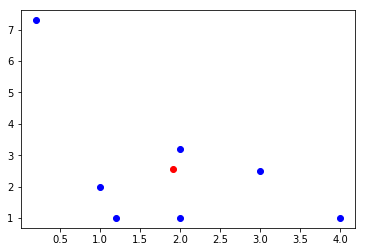

In [114]:
plt.plot(dados["X1"],dados["X2"],"ob") #bolas azuis
plt.plot(centroid_x1,centroid_x2,"or") #bola vermelha, que eh o centroide

In [119]:
def centroide(df):
    result = {}
    cols = list(df.columns)
    for c in cols:
        result[c] = df[c].mean()
    return result

In [120]:
centroide(df_user_final)

{'State_AK': 0.0053022269353128317,
 'State_AL': 0.0031813361611876989,
 'State_AP': 0.0010604453870625664,
 'State_AR': 0.0010604453870625664,
 'State_AZ': 0.014846235418875928,
 'State_CA': 0.12301166489925769,
 'State_CO': 0.021208907741251327,
 'State_DC': 0.014846235418875928,
 'State_DE': 0.0031813361611876989,
 'State_FL': 0.025450689289501591,
 'State_GA': 0.020148462354188761,
 'State_HI': 0.0021208907741251328,
 'State_IA': 0.014846235418875928,
 'State_ID': 0.007423117709437964,
 'State_IL': 0.053022269353128315,
 'State_IN': 0.0095440084835630972,
 'State_KS': 0.0042417815482502655,
 'State_KY': 0.01166489925768823,
 'State_LA': 0.0063626723223753979,
 'State_MD': 0.02863202545068929,
 'State_MI': 0.024390243902439025,
 'State_MN': 0.082714740190880168,
 'State_MO': 0.018027571580063628,
 'State_MS': 0.0031813361611876989,
 'State_MT': 0.0021208907741251328,
 'State_NC': 0.020148462354188761,
 'State_ND': 0.0021208907741251328,
 'State_NE': 0.0063626723223753979,
 'State_NM

In [121]:
def centroide_n(df):
    return df.mean()

In [122]:
centroide_n(df_user_final)

age                          34.051962
sex_F                         0.289502
sex_M                         0.710498
user_id                     472.000000
ocuppation_administrator      0.083775
ocuppation_artist             0.029692
ocuppation_doctor             0.007423
ocuppation_educator           0.100742
ocuppation_engineer           0.071050
ocuppation_entertainment      0.019088
ocuppation_executive          0.033934
ocuppation_healthcare         0.016967
ocuppation_homemaker          0.007423
ocuppation_lawyer             0.012725
ocuppation_librarian          0.054083
ocuppation_marketing          0.027572
ocuppation_none               0.009544
ocuppation_other              0.111347
ocuppation_programmer         0.069989
ocuppation_retired            0.014846
ocuppation_salesman           0.012725
ocuppation_scientist          0.032874
ocuppation_student            0.207847
ocuppation_technician         0.028632
ocuppation_writer             0.047720
State_AK                 

# O algoritmo

In [123]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=0)
km = km.fit(dados)

In [124]:
centers = km.cluster_centers_
c_to_plot = centers.T

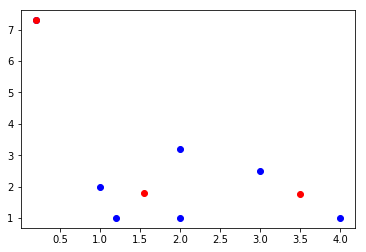

In [126]:
plt.plot(dados["X1"], dados["X2"], "ob")
plt.plot(c_to_plot[0], c_to_plot[1], "or")

In [127]:
km_users = KMeans(n_clusters=3, random_state=0)
km_users = km_users.fit(df_user_final)

In [128]:
labels = pd.DataFrame(km_users.labels_, columns=["label"])
labels.groupby("label").size()

label
0    314
1    315
2    314
dtype: int64

In [131]:
centroides = km_users.cluster_centers_
d12 = dist_n(centroides[0], centroides[1])
d13 = dist_n(centroides[0], centroides[2])
d23 = dist_n(centroides[1], centroides[2])

print("""
D(c1, c2)= {};
D(c1, c3)= {};
D(c2, c3)= {};
""".format(d12, d13, d23))


D(c1, c2)= 314.50017427540786;
D(c1, c3)= 314.00005466881896;
D(c2, c3)= 628.5000355549298;



In [130]:
labels.size

943

# PCA

É um algoritmo de aprendizado não-supervisionado que é usado para reduzir as dimensões dos dados.

Vamos ver um exemplo de diminuição de dimensão de 3D para 2D

In [138]:
from sklearn.decomposition import PCA

In [142]:
pca_model = PCA(n_components=2)
d_2d = pca_model.fit_transform(df_user_final)

In [148]:
dados_2d = pd.DataFrame(d_2d, columns=["z1", "z2"])
dados_2d.head()

,z1,z2
0,228.000876,-6.015626
1,173.998634,9.974884
2,219.001127,-8.015128
3,167.001640,-11.023274
4,465.998908,8.017298


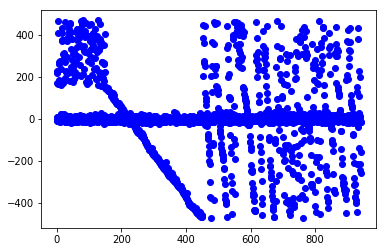

In [150]:
plt.plot(dados_2d, "ob")

In [152]:
# fim